# CV Model Comparison Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv("data/runs-12_12_54-06-Dec-24.csv")

In [3]:
cv_runs = [name for name in df.experiment if name.split("_")[-1].split("-")[0] == "fold"]

In [4]:
df_cv = df[df['experiment'].isin(cv_runs)]
df_cv = df_cv[["experiment", 'AUC_val', 'AUC_train', 'training_time_min', 'avg_epoch_time', 'nr_params', 'nr_flops', "best_epoch", "model_config.model"]]
df_cv["model_config.model"] = ["baseline_freq" if "freq" in name else model.strip("\"") for name, model in zip(df_cv["experiment"], df_cv["model_config.model"])]
df_cv = df_cv.rename(columns={'model_config.model': 'model', "avg_epoch_time": "min_per_epoch"})
df_cv = df_cv.drop("experiment", axis=1)

In [5]:
df_cv

,AUC_val,AUC_train,training_time_min,min_per_epoch,nr_params,nr_flops,best_epoch,model
0,0.68684176,0.71735662,0.7916,0.041663,111537,29872,19,cnn
1,0.67195748,0.70966446,0.7044,0.041435,111537,29872,17,cnn
2,0.67930897,0.69952241,0.5267,0.043892,111537,29872,12,cnn
3,0.67084799,0.70649149,100.5462,1.256827,90177,3392570704,80,xlstm
4,0.66737519,0.70079286,69.1445,1.257173,90177,3392570704,55,xlstm
5,0.67196134,0.71099983,106.2974,1.250558,90177,3392570704,85,xlstm
6,0.68805667,0.69817799,16.2948,0.319506,3364685,136815770,51,LEGnet
7,0.67137791,0.69352899,11.5545,0.296269,610305,1614129280,39,transformer
8,0.68132309,0.70575442,11.8424,0.320065,3364685,136815770,37,LEGnet
9,0.67145252,0.69118834,6.7730,0.294478,610305,1614129280,23,transformer


In [6]:
cols_to_convert = [col for col in df_cv.columns if col != 'model']
df_cv[cols_to_convert] = df_cv[cols_to_convert].astype(float)

In [29]:
df_grouped_std = df_cv.groupby("model").std()
df_grouped_std
# add to all col names std

,AUC_val,AUC_train,training_time_min,min_per_epoch,nr_params,nr_flops,best_epoch
model,,,,,,,
LEGnet,0.005245,0.003887,4.439756,0.003370,0.0,0.0,14.502873
baseline,0.002872,0.040127,0.089899,0.003939,0.0,0.0,0.577350
baseline_freq,0.011200,0.039538,3.678485,0.001979,0.0,0.0,76.334789
cnn,0.007442,0.008945,0.135002,0.001357,0.0,0.0,3.605551
gru,0.004853,0.010876,6.105700,0.013520,0.0,0.0,13.051181
lstm,0.002598,0.008565,1.257855,0.005852,0.0,0.0,4.041452
mamba,0.004990,0.016070,0.231933,0.000648,0.0,0.0,12.096832
transformer,0.003239,0.002774,2.507942,0.002792,0.0,0.0,8.326664
xlstm,0.002392,0.005115,19.997838,0.003724,0.0,0.0,16.072751


In [7]:
df_grouped = df_cv.groupby("model").mean()
df_grouped

,AUC_val,AUC_train,training_time_min,min_per_epoch,nr_params,nr_flops,best_epoch
model,,,,,,,
LEGnet,0.687012,0.701465,16.286367,0.317846,3364685.0,1.368158e+08,51.333333
baseline,0.646748,0.736308,0.620967,0.132833,44276097.0,4.426970e+07,4.666667
baseline_freq,0.711592,0.737739,5.355800,0.046942,42449.0,4.147200e+04,114.000000
cnn,0.679369,0.708848,0.674233,0.042330,111537.0,2.987200e+04,16.000000
gru,0.673896,0.695386,19.812933,0.479745,11298817.0,7.072000e+04,41.333333
lstm,0.657772,0.680054,14.444100,0.292755,616961.0,1.772800e+04,49.333333
mamba,0.674482,0.702913,0.566833,0.020081,6017.0,2.765968e+06,28.333333
transformer,0.673285,0.693811,8.726300,0.293847,610305.0,1.614129e+09,29.666667
xlstm,0.670062,0.706095,91.996033,1.254853,90177.0,3.392571e+09,73.333333


## Results barplots

In [19]:
import matplotlib.pyplot as plt

def plot_variable(df_plot, var, x_min=0, log_scale=False):
    """
    Plots a horizontal bar chart for a given variable in the dataframe.
    
    Parameters:
        df_plot (pd.DataFrame): Dataframe containing the data to plot.
        var (str): Column name for the variable to plot.
        x_min (float): Minimum value for the x-axis. Defaults to 0.
        log_scale (bool): Whether to use a logarithmic scale for the x-axis. Defaults to False.
    """
    # Sort dataframe based on the variable
    df_plot = df_plot.sort_values(var)
    
    plt.figure(figsize=(8, 4))
    plt.barh(df_plot.index, df_plot[var], color='skyblue')
    plt.xlabel(var)
    plt.title(f"Mean {var} over 3 folds")
    
    # Set x-axis limits and scale
    if x_min:
        plt.xlim(x_min, 0.75)
    if log_scale:
        plt.xscale('log')
    
    # Display plot
    plt.show()

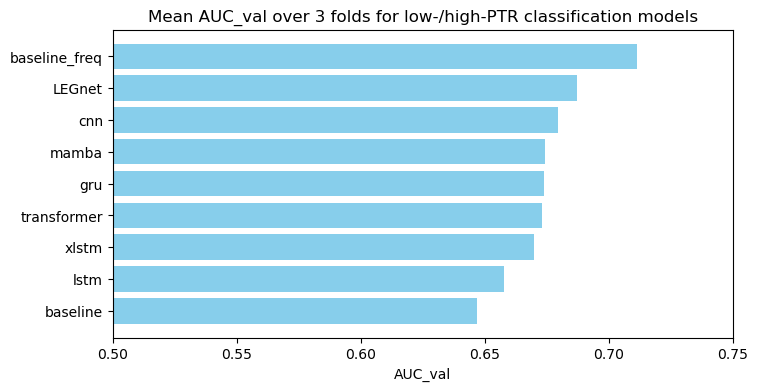

In [20]:
plot_variable(df_grouped.copy(), "AUC_val", x_min=0.5)

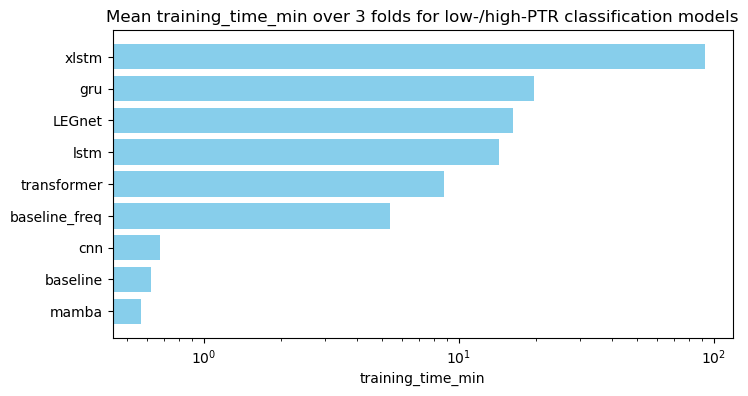

In [23]:
plot_variable(df_grouped.copy(), "training_time_min", log_scale=True)

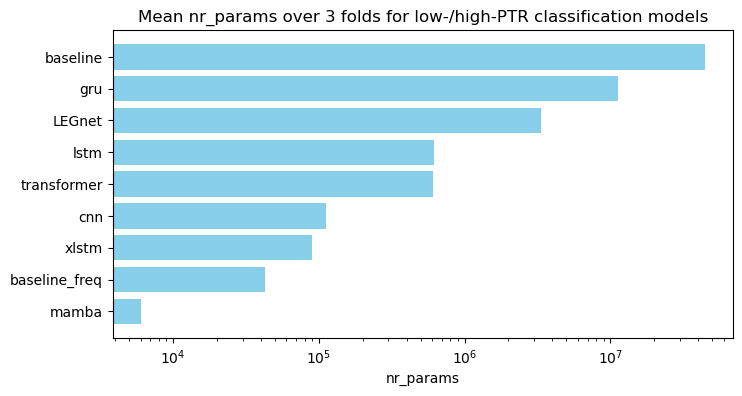

In [24]:
plot_variable(df_grouped.copy(), "nr_params", log_scale=True)

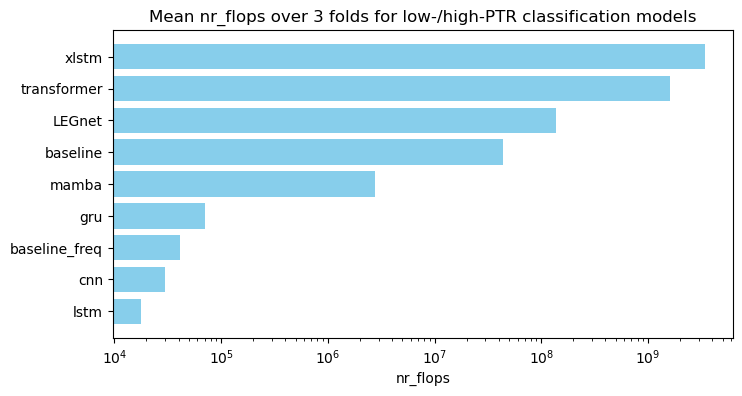

In [25]:
plot_variable(df_grouped.copy(), "nr_flops", log_scale=True)

## Results Table

In [13]:
df_table = df_grouped.copy()
df_table.sort_values(by="AUC_val", ascending=True, inplace=True)
df_table.reset_index(inplace=True)
#df_table.drop(["avg_epoch_time"], axis=1, inplace=True)
df_table[["nr_params", "nr_flops"]] = df_table[["nr_params", "nr_flops"]].astype(int)

In [14]:
df_table = df_table[['model', 'AUC_val', 'AUC_train', 'training_time_min', 'nr_params', 
                      'nr_flops', 'min_per_epoch', 'best_epoch']]

In [18]:
styled_df = (
    df_table.style
    .background_gradient(subset=['AUC_val'], cmap='Greens')  # Color scale for 'val AUC'
    .background_gradient(subset=['training_time_min'], cmap='Reds')  # Color scale for 'Training time'
    .background_gradient(subset=['nr_params'], cmap='Reds')  # Color scale for '# Parameters'
    .background_gradient(subset=['nr_flops'], cmap='Reds')  # Color scale for '# Parameters'
    .background_gradient(subset=['min_per_epoch'], cmap='Reds')  # Color scale for '# Parameters'
    .background_gradient(subset=['best_epoch'], cmap='Reds')  # Color scale for '# Parameters'
    .format(precision=4)
)

# Display the styled DataFrame (for example, in Jupyter Notebook)

styled_df

,model,AUC_val,AUC_train,training_time_min,nr_params,nr_flops,min_per_epoch,best_epoch
0,baseline,0.6467,0.7363,0.6210,44276097,44269696,0.1328,4.6667
1,lstm,0.6578,0.6801,14.4441,616961,17728,0.2928,49.3333
2,xlstm,0.6701,0.7061,91.9960,90177,3392570704,1.2549,73.3333
3,transformer,0.6733,0.6938,8.7263,610305,1614129280,0.2938,29.6667
4,gru,0.6739,0.6954,19.8129,11298817,70720,0.4797,41.3333
5,mamba,0.6745,0.7029,0.5668,6017,2765968,0.0201,28.3333
6,cnn,0.6794,0.7088,0.6742,111537,29872,0.0423,16.0000
7,LEGnet,0.6870,0.7015,16.2864,3364685,136815770,0.3178,51.3333
8,baseline_freq,0.7116,0.7377,5.3558,42449,41472,0.0469,114.0000


## Mocked Results for pre-paper talk

In [16]:
# Final results for classification
mock_data = {
    "model": {
        "0": "RFR - paper (freq)",
        "1": "LEGnet",
        "2": "MLP (freq)",
        "3": "PTRnet*"
    },
    "val AUC": {
        "0": 0.643167409,
        "1": 0.70593376,
        "2": 0.73859899,
        "3": 0.8215
    },
    "# Parameters": {
        "0": np.nan,
        "1": 4564189,
        "2": 19177,
        "3": 124561
    }
}
mock_data = pd.DataFrame(mock_data)

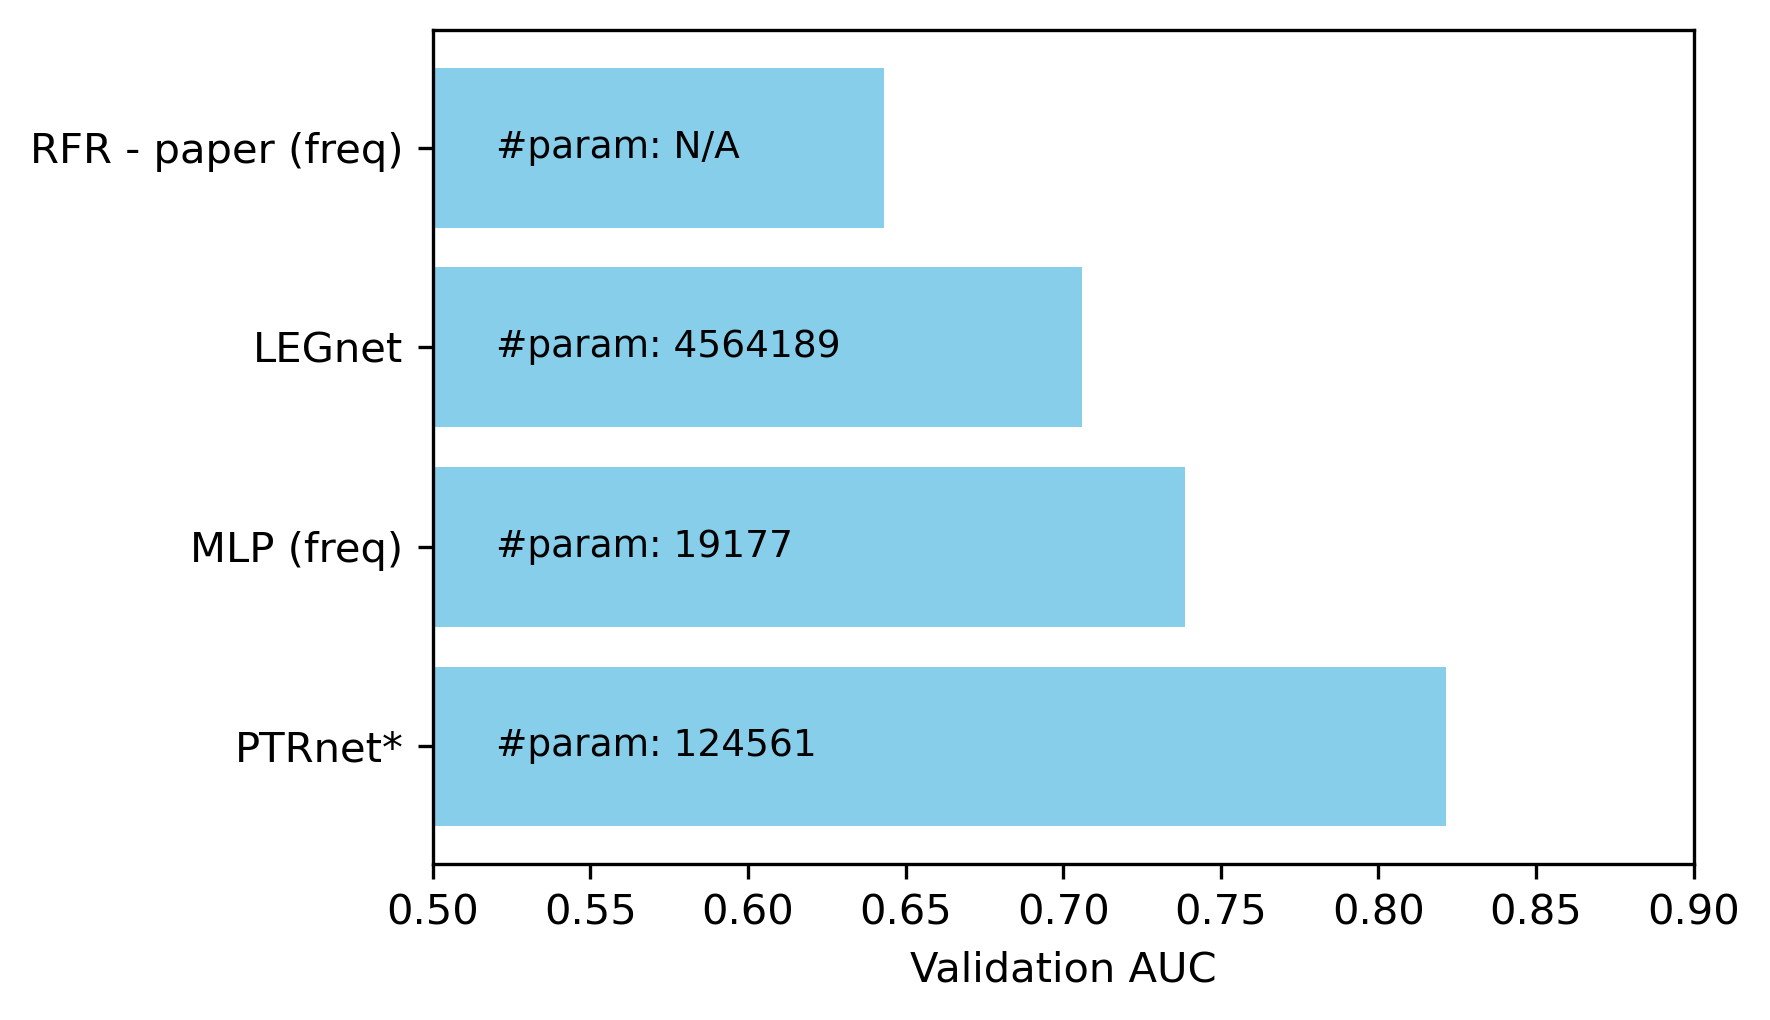

In [17]:
# Sort and index the DataFrame for plotting
df_plot = mock_data  # Use the existing DataFrame
df_plot.index = df_plot["model"]
df_plot.sort_values(by="val AUC", inplace=True)

# Create the horizontal bar plot
plt.figure(figsize=(6, 3.5), dpi=300)
bars = plt.barh(df_plot.index, df_plot['val AUC'], color='skyblue')

# Add parameters as text on top of the bars
for bar, param in zip(bars, df_plot['# Parameters']):
    plt.text(
        0.52,  # X position just to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the text vertically
        f"#param: {int(param) if not np.isnan(param) else 'N/A'}",  # Format the text
        va='center',  # Vertical alignment
        fontsize=9  # Font size
    )

# Add labels, title, and adjust axes
plt.xlabel("Validation AUC")
#plt.title("Validation AUC for low-/high-PTR classification models")
plt.xlim(0.5, 0.9)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()